In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:, :-1])
y = df['target']


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


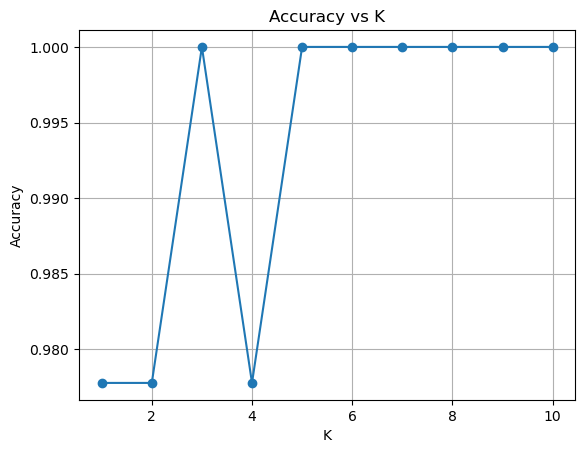

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

accuracy_scores = []
k_range = range(1, 11)

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

# Plot accuracy
plt.plot(k_range, accuracy_scores, marker='o')
plt.title('Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [5]:
best_k = accuracy_scores.index(max(accuracy_scores)) + 1
print(f"Best K: {best_k}")

model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Best K: 3
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Accuracy: 1.0


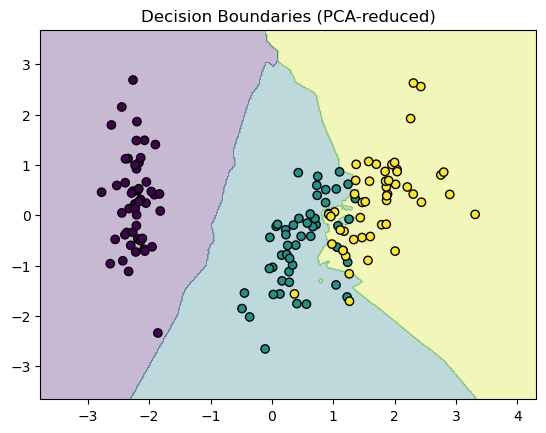

In [6]:
from sklearn.decomposition import PCA
import numpy as np

# Reduce features to 2D for plotting
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Train on reduced features
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_reduced, y)

# Plot
h = .02
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolor='k')
plt.title("Decision Boundaries (PCA-reduced)")
plt.show()
